In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("Fraud Detection Dataset.csv")
df.head(2)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0


In [3]:
#Deleting insignificant features
df.drop(['Transaction_ID','User_ID'],axis=1,inplace=True)
df.head(2)

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_Amount                48480 non-null  float64
 1   Transaction_Type                  51000 non-null  object 
 2   Time_of_Transaction               48448 non-null  float64
 3   Device_Used                       48527 non-null  object 
 4   Location                          48453 non-null  object 
 5   Previous_Fraudulent_Transactions  51000 non-null  int64  
 6   Account_Age                       51000 non-null  int64  
 7   Number_of_Transactions_Last_24H   51000 non-null  int64  
 8   Payment_Method                    48531 non-null  object 
 9   Fraudulent                        51000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.9+ MB


In [5]:
#Extracting the numerical features
num_features=[features for features in df.columns if df[features].dtype!='O']
num_features

['Transaction_Amount',
 'Time_of_Transaction',
 'Previous_Fraudulent_Transactions',
 'Account_Age',
 'Number_of_Transactions_Last_24H',
 'Fraudulent']

In [6]:
cat_features=[features for features in df.columns if df[features].dtype=='O']
cat_features

['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']

In [7]:
df[num_features].describe()

,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


'\nFrom the heatmap , we can observe that there is hardly any correlation between the features\nand hence all the numerical features are important and is to be considered.\n'

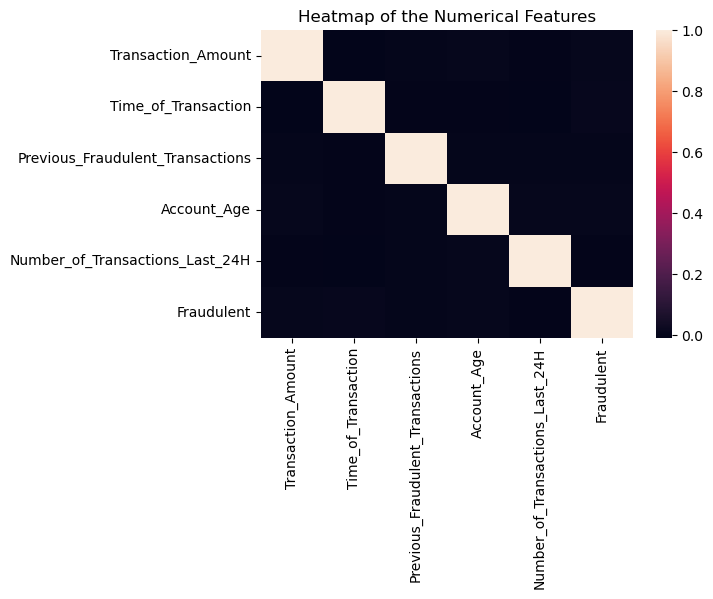

In [8]:
plt.figure(figsize=(6,4))
plt.title("Heatmap of the Numerical Features")
sns.heatmap(df[num_features].corr())
'''
From the heatmap , we can observe that there is hardly any correlation between the features
and hence all the numerical features are important and is to be considered.
'''

<Axes: title={'center': 'Histogram of Transaction Amount'}, xlabel='Transaction Amount', ylabel='Count'>

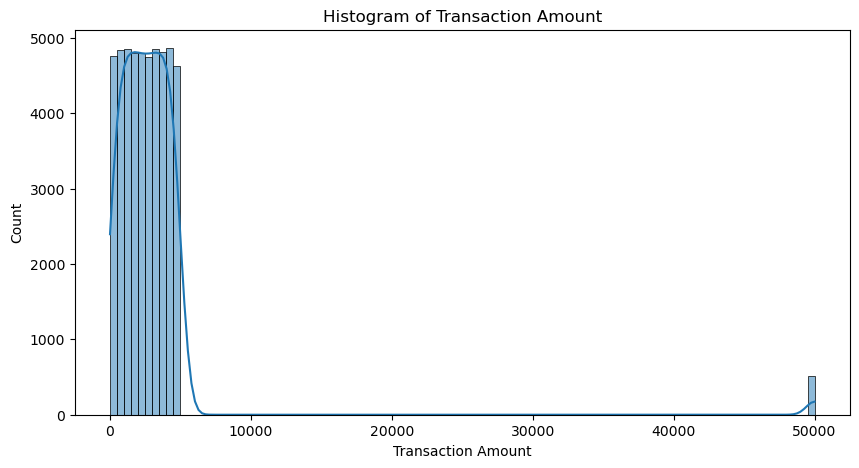

In [9]:
plt.figure(figsize=(10,5))
plt.title("Histogram of Transaction Amount")
plt.xlabel('Transaction Amount')
sns.histplot(df['Transaction_Amount'],kde=True,bins=100,)

<Axes: title={'center': 'Boxplot of Transaction Amount'}, ylabel='Transaction Amount'>

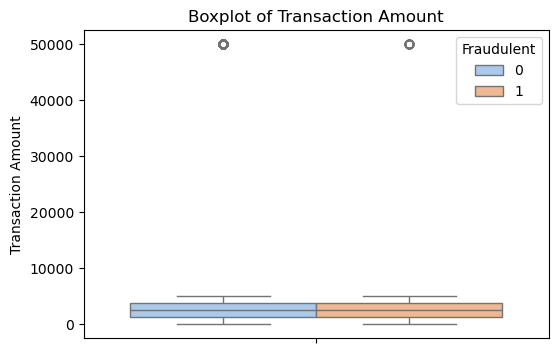

In [13]:
plt.figure(figsize=(6,4))
plt.title("Boxplot of Transaction Amount")
plt.ylabel("Transaction Amount")
sns.boxplot(data=df,y=df['Transaction_Amount'],hue=df['Fraudulent'],palette='pastel')
#Presence of outliers

<Axes: title={'center': 'Boxplot of Account Age'}, ylabel='Age'>

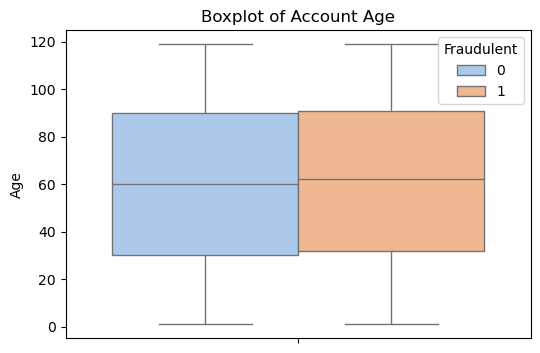

In [15]:
plt.figure(figsize=(6,4))
plt.title("Boxplot of Account Age")
plt.ylabel("Age")
sns.boxplot(data=df,y=df['Account_Age'],hue=df['Fraudulent'],palette='pastel')

In [19]:
df['Device_Used'].unique()

array(['Tablet', 'Mobile', 'Desktop', nan, 'Unknown Device'], dtype=object)

([<matplotlib.patches.Wedge at 0x1427ef4e180>,
 [Text(0.6206895170568614, 0.9081544601089181, 'Tablet'),
  Text(-1.0913848717366341, 0.13740109804659892, 'Mobile'),
  Text(0.4022651704859459, -1.0238079569010554, 'Desktop'),
  Text(1.2935153961999681, -0.12968392264902884, 'Unknown Device')],
 [Text(0.33855791839465166, 0.495356978241228, ' 30.9%'),
  Text(-0.5953008391290731, 0.07494605347996304, ' 34.2%'),
  Text(0.21941736571960682, -0.558440703764212, ' 31.7%'),
  Text(0.7960094745845958, -0.07980549086094081, ' 3.2%')])

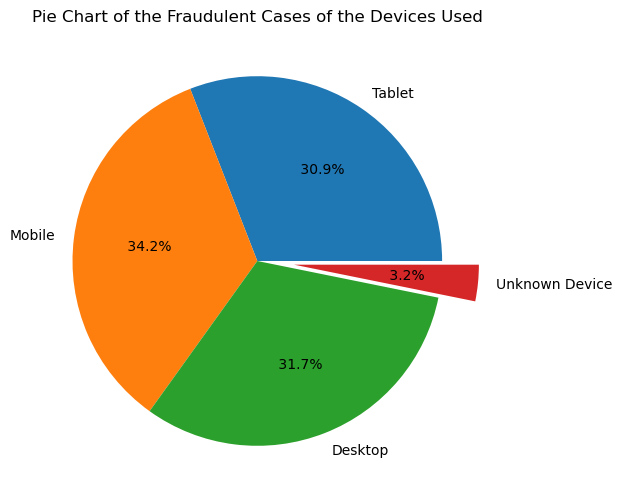

In [23]:
#Pie Chart
plt.figure(figsize=(6,6))
plt.title("Pie Chart of the Fraudulent Cases of the Devices Used")
v_tab = df[(df['Device_Used'] == 'Tablet') & (df['Fraudulent'] == 1)].shape[0]
v_mob = df[(df['Device_Used'] == 'Mobile') & (df['Fraudulent'] == 1)].shape[0]
v_desk = df[(df['Device_Used'] == 'Desktop') & (df['Fraudulent'] == 1)].shape[0]
v_unk = df[(df['Device_Used'] == 'Unknown Device') & (df['Fraudulent'] == 1)].shape[0]
p1=v_tab/(v_tab+v_mob+v_desk+v_unk)
p2=v_mob/(v_tab+v_mob+v_desk+v_unk)
p3=v_desk/(v_tab+v_mob+v_desk+v_unk)
p4=v_unk/(v_tab+v_mob+v_desk+v_unk)
plt.pie(np.array([p1,p2,p3,p4]),labels=['Tablet','Mobile','Desktop','Unknown Device'],autopct="% 1.1f%%",explode=(0,0,0,0.2))

In [24]:
df['Payment_Method'].unique()

array(['Debit Card', 'Credit Card', nan, 'UPI', 'Net Banking',
       'Invalid Method'], dtype=object)

([<matplotlib.patches.Wedge at 0x1427f071fd0>,
 [Text(0.8069618207039291, 0.7475377046853222, 'Debit Card'),
  Text(-0.6859992529733648, 0.8598866349234563, 'Credit Card'),
  Text(-0.8744715056823783, -0.6673077144388444, 'UPI'),
  Text(0.6483061855133353, -0.8886501504108066, 'Net Banking'),
  Text(1.2940939082280856, -0.12377785216653121, 'Invalid Method')],
 [Text(0.44016099311123397, 0.40774783891926664, ' 23.8%'),
  Text(-0.3741814107127444, 0.4690290735946125, ' 23.9%'),
  Text(-0.4769844576449336, -0.3639860260575514, ' 25.4%'),
  Text(0.35362155573454646, -0.4847182638604399, ' 23.9%'),
  Text(0.796365481986514, -0.07617098594863458, ' 3.0%')])

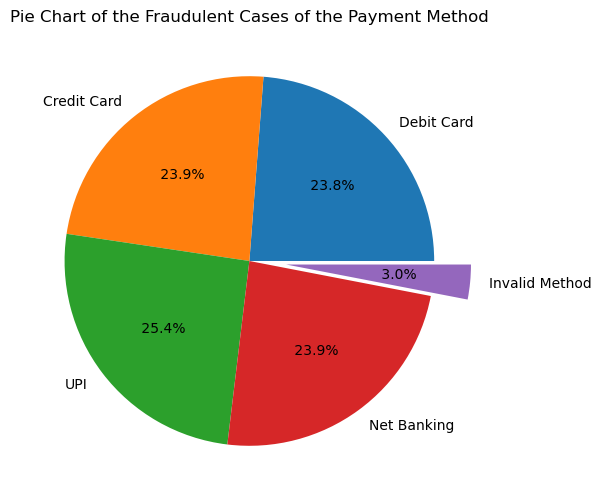

In [26]:
#Pie Chart
plt.figure(figsize=(6,6))
plt.title("Pie Chart of the Fraudulent Cases of the Payment Method")
v_debit = df[(df['Payment_Method'] == 'Debit Card') & (df['Fraudulent'] == 1)].shape[0]
v_credit = df[(df['Payment_Method'] == 'Credit Card') & (df['Fraudulent'] == 1)].shape[0]
v_upi = df[(df['Payment_Method'] == 'UPI') & (df['Fraudulent'] == 1)].shape[0]
v_net = df[(df['Payment_Method'] == 'Net Banking') & (df['Fraudulent'] == 1)].shape[0]
v_inv = df[(df['Payment_Method'] == 'Invalid Method') & (df['Fraudulent'] == 1)].shape[0]

p1=v_debit/(v_debit+v_credit+v_upi+v_net+v_inv)
p2=v_credit/(v_debit+v_credit+v_upi+v_net+v_inv)
p3=v_upi/(v_debit+v_credit+v_upi+v_net+v_inv)
p4=v_net/(v_debit+v_credit+v_upi+v_net+v_inv)
p5=v_inv/(v_debit+v_credit+v_upi+v_net+v_inv)
plt.pie(np.array([p1,p2,p3,p4,p5]),labels=['Debit Card','Credit Card','UPI','Net Banking','Invalid Method'],autopct="% 1.1f%%",explode=(0,0,0,0,0.2))

In [ ]:
df['Transaction_Type'].unique()

'ATM Withdrawal'

([<matplotlib.patches.Wedge at 0x1427e13fad0>,
 [Text(0.9127958967206918, 0.6138433439647842, 'ATM Withdrawal'),
  Text(-0.27649158926813844, 1.064684179023986, 'Bill Payment'),
  Text(-1.0990618304107755, 0.045421282832123155, 'POS Payment'),
  Text(-0.3866964448601362, -1.0297892306353431, 'Bank Transfer'),
  Text(0.8717798880671687, -0.6708202641256413, 'Online Purchase')],
 [Text(0.49788867093855915, 0.3348236421626095, ' 18.8%'),
  Text(-0.1508135941462573, 0.5807368249221742, ' 20.4%'),
  Text(-0.5994882711331503, 0.024775245181158083, ' 20.2%'),
  Text(-0.21092533356007429, -0.5617032167101871, ' 19.7%'),
  Text(0.47551630258209193, -0.3659019622503498, ' 20.9%')])

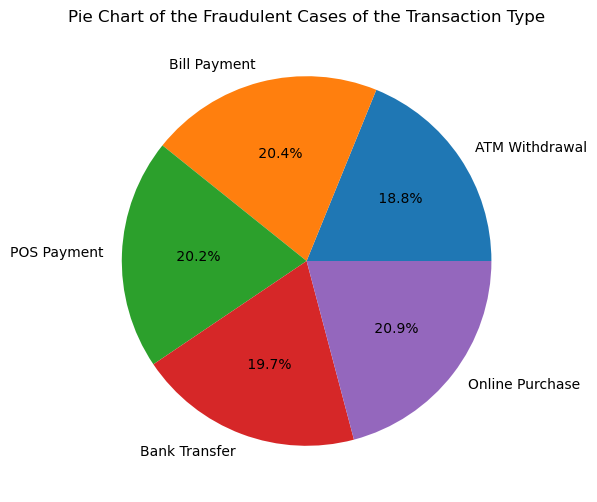

In [31]:
#Pie Chart
plt.figure(figsize=(6,6))
plt.title("Pie Chart of the Fraudulent Cases of the Transaction Type")
v_atm = df[(df['Transaction_Type'] == 'ATM Withdrawal') & (df['Fraudulent'] == 1)].shape[0]
v_bill = df[(df['Transaction_Type'] == 'Bill Payment') & (df['Fraudulent'] == 1)].shape[0]
v_pos = df[(df['Transaction_Type'] == 'POS Payment') & (df['Fraudulent'] == 1)].shape[0]
v_bank = df[(df['Transaction_Type'] == 'Bank Transfer') & (df['Fraudulent'] == 1)].shape[0]
v_onl = df[(df['Transaction_Type'] == 'Online Purchase') & (df['Fraudulent'] == 1)].shape[0]

p1=v_atm/(v_atm+v_bill+v_pos+v_bank+v_onl)
p2=v_bill/(v_atm+v_bill+v_pos+v_bank+v_onl)
p3=v_pos/(v_atm+v_bill+v_pos+v_bank+v_onl)
p4=v_bank/(v_atm+v_bill+v_pos+v_bank+v_onl)
p5=v_onl/(v_atm+v_bill+v_pos+v_bank+v_onl)
plt.pie(np.array([p1,p2,p3,p4,p5]),labels=df['Transaction_Type'].unique(),autopct="% 1.1f%%")

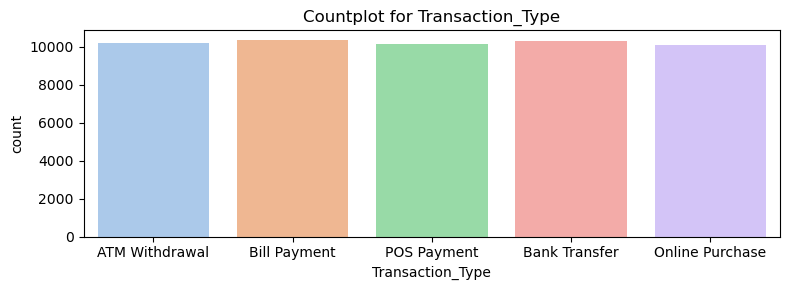

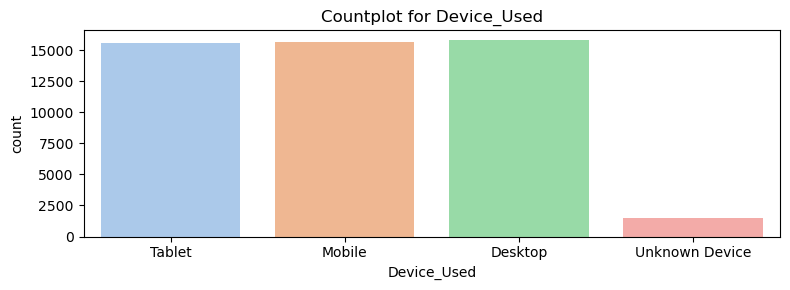

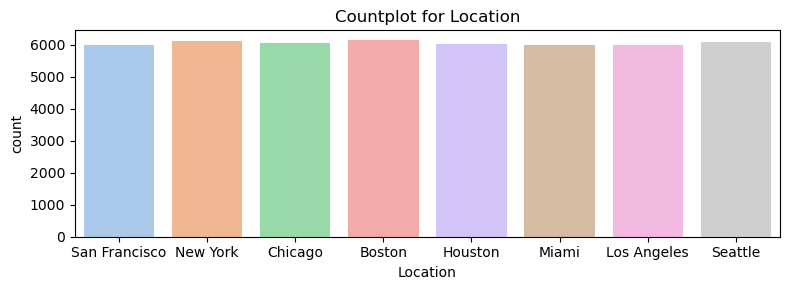

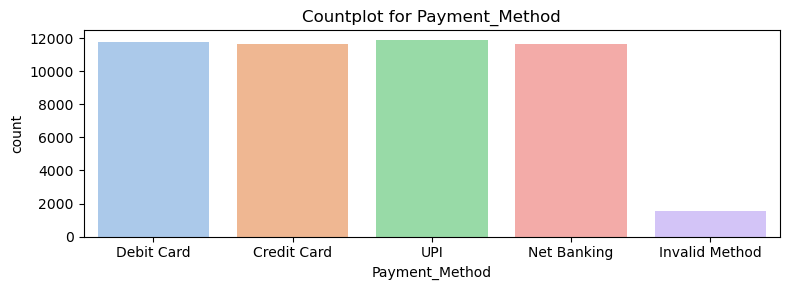

In [39]:
for col in cat_features:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=col,palette='pastel')
    plt.title(f"Countplot for {col}")
    plt.tight_layout()
    plt.show()